# Week 8 Practice

## Black-Scholes Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

###  European Options

Non-Dividend Paying Options

In [2]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [3]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [4]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

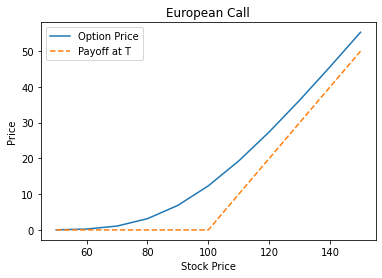

In [5]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Dividend Paying Options

In [6]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [7]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [8]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

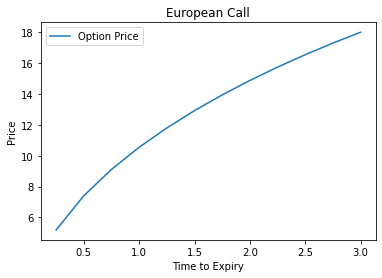

In [9]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

### Option Trading

Has Black Scholes correctly predicted the market value of the options?

In [10]:
AAPL = yf.Ticker('AAPL')
opt = AAPL.option_chain('2022-03-25')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL220325C00105000,2022-03-14 17:29:39+00:00,105.0,45.83,0.00,0.0,0.0,0.0,2,6,0.000010,True,REGULAR,USD
1,AAPL220325C00110000,2022-03-15 19:43:23+00:00,110.0,44.95,0.00,0.0,0.0,0.0,60,75,0.000010,True,REGULAR,USD
2,AAPL220325C00115000,2022-02-25 16:46:16+00:00,115.0,49.47,0.00,0.0,0.0,0.0,1,1,0.000010,True,REGULAR,USD
3,AAPL220325C00120000,2022-03-14 17:18:52+00:00,120.0,31.05,0.00,0.0,0.0,0.0,10,28,0.000010,True,REGULAR,USD
4,AAPL220325C00125000,2022-03-15 19:32:05+00:00,125.0,30.32,0.00,0.0,0.0,0.0,15,38,0.000010,True,REGULAR,USD
5,AAPL220325C00130000,2022-03-15 19:31:44+00:00,130.0,25.40,0.00,0.0,0.0,0.0,103,87,0.000010,True,REGULAR,USD
6,AAPL220325C00135000,2022-03-15 19:33:01+00:00,135.0,20.62,0.00,0.0,0.0,0.0,41,58,0.000010,True,REGULAR,USD
7,AAPL220325C00140000,2022-03-15 19:55:44+00:00,140.0,15.72,0.00,0.0,0.0,0.0,215,359,0.000010,True,REGULAR,USD
8,AAPL220325C00143000,2022-03-15 17:30:00+00:00,143.0,11.55,0.00,0.0,0.0,0.0,12,39,0.000010,True,REGULAR,USD
9,AAPL220325C00144000,2022-03-15 15:54:24+00:00,144.0,11.05,0.00,0.0,0.0,0.0,13,65,0.000010,True,REGULAR,USD


In [12]:
data = yf.download("AAPL", start="2021-03-18", end="2022-03-18")

[*********************100%***********************]  1 of 1 completed


In [13]:
data['Adj Close']

Date
2021-03-18    119.817856
2021-03-19    119.281052
2021-03-22    122.660965
2021-03-23    121.815987
2021-03-24    119.380455
                 ...    
2022-03-09    162.949997
2022-03-10    158.520004
2022-03-11    154.729996
2022-03-14    150.619995
2022-03-15    155.089996
Name: Adj Close, Length: 251, dtype: float64

In [28]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1/52
r = 0.0185
q = 0.0057
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.24075270234485754

In [29]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [30]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error
0,AAPL220325C00105000,2022-03-14 17:29:39+00:00,105.0,45.83,0.00,0.0,0.0,0.0,2,6,0.000010,True,REGULAR,USD,50.11,9.317041
1,AAPL220325C00110000,2022-03-15 19:43:23+00:00,110.0,44.95,0.00,0.0,0.0,0.0,60,75,0.000010,True,REGULAR,USD,45.11,0.333704
2,AAPL220325C00115000,2022-02-25 16:46:16+00:00,115.0,49.47,0.00,0.0,0.0,0.0,1,1,0.000010,True,REGULAR,USD,40.11,-18.940772
3,AAPL220325C00120000,2022-03-14 17:18:52+00:00,120.0,31.05,0.00,0.0,0.0,0.0,10,28,0.000010,True,REGULAR,USD,35.12,13.043478
4,AAPL220325C00125000,2022-03-15 19:32:05+00:00,125.0,30.32,0.00,0.0,0.0,0.0,15,38,0.000010,True,REGULAR,USD,30.12,-0.725594
5,AAPL220325C00130000,2022-03-15 19:31:44+00:00,130.0,25.40,0.00,0.0,0.0,0.0,103,87,0.000010,True,REGULAR,USD,25.12,-1.181102
6,AAPL220325C00135000,2022-03-15 19:33:01+00:00,135.0,20.62,0.00,0.0,0.0,0.0,41,58,0.000010,True,REGULAR,USD,20.12,-2.521823
7,AAPL220325C00140000,2022-03-15 19:55:44+00:00,140.0,15.72,0.00,0.0,0.0,0.0,215,359,0.000010,True,REGULAR,USD,15.12,-3.880407
8,AAPL220325C00143000,2022-03-15 17:30:00+00:00,143.0,11.55,0.00,0.0,0.0,0.0,12,39,0.000010,True,REGULAR,USD,12.14,4.935065
9,AAPL220325C00144000,2022-03-15 15:54:24+00:00,144.0,11.05,0.00,0.0,0.0,0.0,13,65,0.000010,True,REGULAR,USD,11.15,0.723982


In [31]:
opt.calls['estimate_error'] = ((opt.calls['BSMPrice'] - opt.calls['lastPrice'])/opt.calls['lastPrice'])*100
opt.calls['estimate_error']

0       9.338861
1       0.355951
2     -18.920558
3      13.107890
4      -0.659631
5      -1.102362
6      -2.424830
7      -3.816794
8       5.108225
9       0.904977
10     -9.285714
11     -7.638191
12     -2.485207
13    -15.977011
14    -20.372671
15    -22.517483
16    -32.336449
17    -43.200000
18    -54.693878
19    -66.666667
20    -75.308642
21    -82.926829
22    -90.909091
23    -91.666667
24   -100.000000
25   -100.000000
26   -100.000000
27   -100.000000
28   -100.000000
29   -100.000000
30   -100.000000
31   -100.000000
32   -100.000000
33   -100.000000
34   -100.000000
35   -100.000000
36   -100.000000
37   -100.000000
38   -100.000000
39   -100.000000
40   -100.000000
41   -100.000000
42   -100.000000
43   -100.000000
Name: estimate_error, dtype: float64

In [32]:
opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     44.000000
mean     -59.411199
std       44.786600
min     -100.000000
25%     -100.000000
50%      -86.917960
75%       -8.873833
max       13.107890
Name: estimate_error, dtype: float64

Our mean estimation error is -59.41%, with a standard deviation of 44.79% points. Our median is even more promising at around -86.91%. Our standard deviation still seems a bit high.

Text(0.5, 1.0, 'Histogram of Estimate Error')

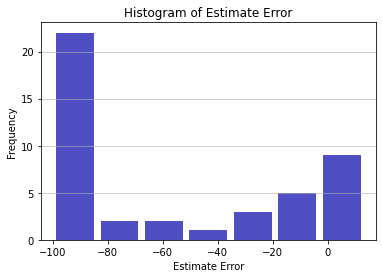

In [33]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

### Mibian - Options Pricing Library

MibianLib is an open source python library for options pricing. You can use it to calculate the price, the implied volatility, the greeks or the put/call parity of an option using the Black-Scholes(-Merton) pricing models.

In [34]:
pip install mibian

  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4039 sha256=a33fe09843ecbfdd95a9575867756bd21d895339d48a7b4d65533d4babe57121
  Stored in directory: c:\users\gongh\appdata\local\pip\cache\wheels\43\b9\31\945abf284df5614e45ec4fccb8a892025987093558c94902fb
Successfully built mibian
Note: you may need to restart the kernel to use updated packages.


In [35]:
import mibian as mb

In [36]:
option_100 = mb.BS([S, 100, r*100, 30], volatility = vol*100)

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [37]:
option_100.callPrice

55.241935587793606

In [38]:
option_100d = mb.Me([S, 100, r*100, q*100, 30], volatility = vol*100)

# Used for pricing European options on stocks with dividends
# Me([underlyingPrice, strikePrice, interestRate, annualDividends, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [39]:
option_100d.callPrice

55.195093348095625

In [42]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 7], volatility = vol*100).callPrice

In [43]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL220325C00105000,2022-03-14 17:29:39+00:00,105.0,45.83,0.00,0.0,0.0,0.0,2,6,0.000010,True,REGULAR,USD,50.11,9.338861,50.12
1,AAPL220325C00110000,2022-03-15 19:43:23+00:00,110.0,44.95,0.00,0.0,0.0,0.0,60,75,0.000010,True,REGULAR,USD,45.11,0.355951,45.12
2,AAPL220325C00115000,2022-02-25 16:46:16+00:00,115.0,49.47,0.00,0.0,0.0,0.0,1,1,0.000010,True,REGULAR,USD,40.11,-18.920558,40.12
3,AAPL220325C00120000,2022-03-14 17:18:52+00:00,120.0,31.05,0.00,0.0,0.0,0.0,10,28,0.000010,True,REGULAR,USD,35.12,13.107890,35.12
4,AAPL220325C00125000,2022-03-15 19:32:05+00:00,125.0,30.32,0.00,0.0,0.0,0.0,15,38,0.000010,True,REGULAR,USD,30.12,-0.659631,30.12
5,AAPL220325C00130000,2022-03-15 19:31:44+00:00,130.0,25.40,0.00,0.0,0.0,0.0,103,87,0.000010,True,REGULAR,USD,25.12,-1.102362,25.13
6,AAPL220325C00135000,2022-03-15 19:33:01+00:00,135.0,20.62,0.00,0.0,0.0,0.0,41,58,0.000010,True,REGULAR,USD,20.12,-2.424830,20.13
7,AAPL220325C00140000,2022-03-15 19:55:44+00:00,140.0,15.72,0.00,0.0,0.0,0.0,215,359,0.000010,True,REGULAR,USD,15.12,-3.816794,15.13
8,AAPL220325C00143000,2022-03-15 17:30:00+00:00,143.0,11.55,0.00,0.0,0.0,0.0,12,39,0.000010,True,REGULAR,USD,12.14,5.108225,12.14
9,AAPL220325C00144000,2022-03-15 15:54:24+00:00,144.0,11.05,0.00,0.0,0.0,0.0,13,65,0.000010,True,REGULAR,USD,11.15,0.904977,11.15


In [44]:
opt.calls['estimate_error_mb'] = ((opt.calls['MB_BSMPrice'] - opt.calls['lastPrice'] )/opt.calls['lastPrice'] )*100
opt.calls['estimate_error_mb']

0       9.360681
1       0.378198
2     -18.900344
3      13.107890
4      -0.659631
5      -1.062992
6      -2.376334
7      -3.753181
8       5.108225
9       0.904977
10     -9.196429
11     -7.537688
12     -2.485207
13    -15.977011
14    -20.372671
15    -22.377622
16    -32.149533
17    -43.200000
18    -54.693878
19    -66.666667
20    -75.308642
21    -82.926829
22    -90.909091
23   -100.000000
24   -100.000000
25   -100.000000
26   -100.000000
27   -100.000000
28   -100.000000
29   -100.000000
30   -100.000000
31   -100.000000
32   -100.000000
33   -100.000000
34   -100.000000
35   -100.000000
36   -100.000000
37   -100.000000
38   -100.000000
39   -100.000000
40   -100.000000
41   -100.000000
42   -100.000000
43   -100.000000
Name: estimate_error_mb, dtype: float64

In [45]:
opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     44.000000
mean     -59.583949
std       44.960239
min     -100.000000
25%     -100.000000
50%      -86.917960
75%       -8.781744
max       13.107890
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

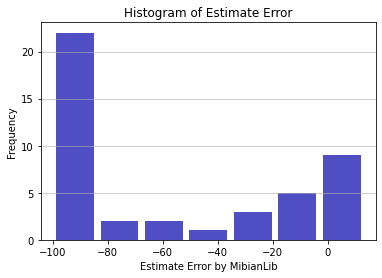

In [46]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

Although the mean and median estimation of error have increased, the standard deviation has decreased. Overall, the results is consistent.